Dataset: Titanic Dataset

Description:

This task involves working with the Titanic dataset, which contains
passenger information from the ill-fated Titanic ship. The dataset
includes features such as age, gender, class, and whether passengers
survived or not. As a machine learning intern, your objective is to
build a predictive model that can classify whether a passenger
survived or not based on the available features. This is a binary
classification problem.

In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

import random
from time import time

import math
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import hvplot.pandas

plt.style.use("ggplot")
#plt.style.use("fivethirtyeight")

dot_file_path = 'D:/TreeChart/decision_tree.dot'

from functools import reduce

# Warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc

from sklearn.model_selection import train_test_split


from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn import model_selection

import graphviz
from sklearn import tree

In [3]:
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ["PYTHONHASHSEED"] = str(seed_value)

In [4]:
SEED = 42
set_seed(SEED)

In [5]:
train_data = pd.read_csv("Task_1//train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info() , train_data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
 PassengerId    891
 Survived         2
 Pclass           3
 Name           891
 Sex              2
 Age             88
 SibSp            7
 Parch            7
 Ticket         681
 Fare           248
 Cabin          147
 Embarked         3
 dtype: int64)

In [7]:
train_data.shape , train_data.isnull().sum() 

((891, 12),
 PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64)

Total there are 418 rows and 11 Columns
Age has 86 Missing values, Cabin has 327 Missing values, Fare has 1 missing value

In [8]:
test_data = pd.read_csv("Task_1//test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test_data.info() , test_data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


(None,
 PassengerId    418
 Pclass           3
 Name           418
 Sex              2
 Age             79
 SibSp            7
 Parch            8
 Ticket         363
 Fare           169
 Cabin           76
 Embarked         3
 dtype: int64)

In [10]:
test_data.shape , test_data.isnull().sum() 

((418, 11),
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

Total there are 418 rows and 11 Columns Age has 86 Missing values, Cabin has 327 Missing values, Fare has 1 missing value

# 1. Visualize the Data

In [11]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

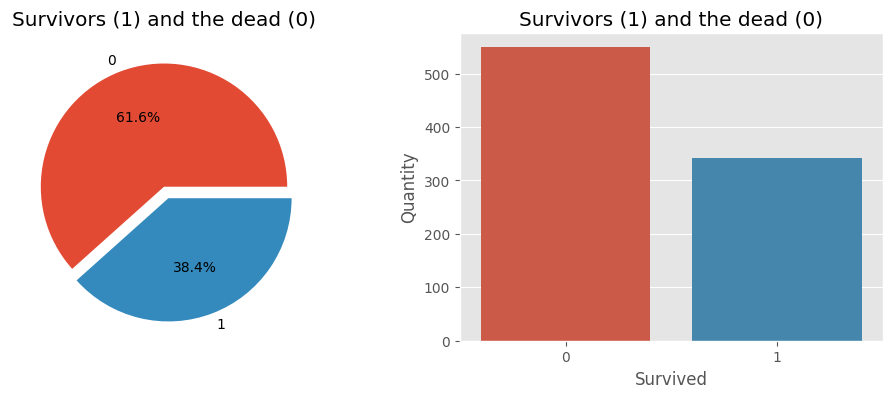

In [12]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train_data['Survived'].value_counts().plot.pie( 
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 

ax[0].set_title('Survivors (1) and the dead (0)') 
ax[0].set_ylabel('') 

sns.countplot(data=train_data, x = 'Survived', ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)')

plt.show() 

Check the Sex Faeture and what is the impact

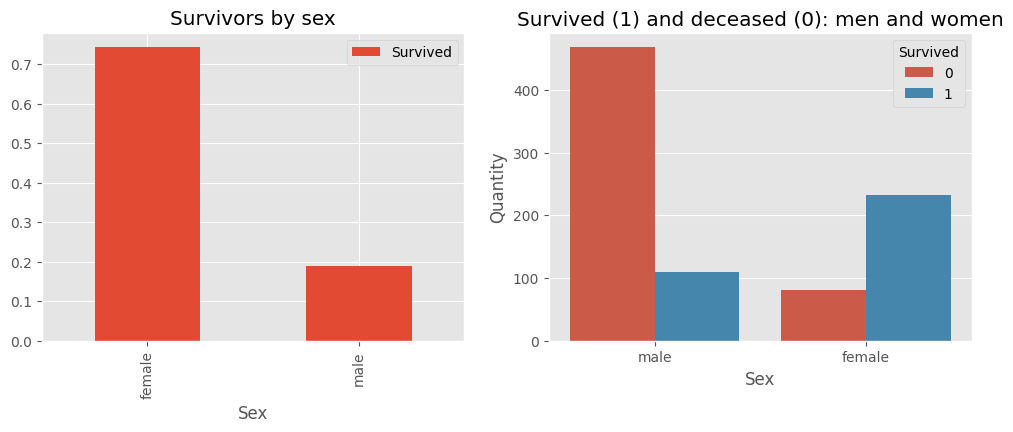

In [13]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
sns.countplot(data=train_data, x = 'Sex', hue='Survived', ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 
plt.show() 

As we have see above that there are missing values for Cabin and its significant amount we are doing feature engineering

In [14]:
# Create a new column cabinbool indicating 
# if the cabin value was given or was NaN 
train_data["CabinBool"] = (train_data["Cabin"].notnull().astype('int')) 
test_data["CabinBool"] = (test_data["Cabin"].notnull().astype('int')) 
  
# Delete the column 'Cabin' from test 
# and train dataset 
train_data = train_data.drop(['Cabin'], axis=1) 
test_data = test_data.drop(['Cabin'], axis=1)

In [15]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [16]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinBool
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,0


We can also drop the Ticket feature since it’s unlikely to yield any useful information

In [17]:
train_data = train_data.drop(['Ticket'], axis=1) 
test_data = test_data.drop(['Ticket'], axis=1) 

In [18]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
CabinBool        0
dtype: int64

In [19]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

There are missing values in the Embarked feature. For that, we will replace the NULL values with ‘S’ as the number of Embarks for ‘S’ are higher than the other two.

In [20]:
# replacing the missing values in  
# the Embarked feature with S 
train_data = train_data.fillna({"Embarked": "S"}) 

We will now sort the age into groups. We will combine the age groups of the people and categorize them into the same groups. BY doing so we will be having fewer categories and will have a better prediction since it will be a categorical dataset.

In [21]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [22]:
# sort the ages into logical categories 
train_data["Age"] = train_data["Age"].fillna(-0.5) 
test_data["Age"] = test_data["Age"].fillna(-0.5) 
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
          'Student', 'Young Adult', 'Adult', 'Senior'] 
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels=labels) 
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels=labels) 

In [23]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,Student
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,8.0500,S,0,Unknown
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,1,Adult
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0,Adult
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,8.0500,S,0,Unknown


In the ‘title’ column for both the test and train set, we will categorize them into an equal number of classes. Then we will assign numerical values to the title for convenience of model training.

In [24]:
# create a combined group of both datasets 
combine = [train_data, test_data] 
  
# extract a title for each Name in the  
# train and test datasets 
for dataset in combine: 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
  
pd.crosstab(train_data['Title'], train_data['Sex']) 
  
# replace various titles with more common names 
for dataset in combine: 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 
                                                 'Don', 'Dr', 'Major', 
                                                 'Rev', 'Jonkheer', 'Dona'], 
                                                'Rare') 
  
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal') 
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 
  
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 
  
# map each of the title groups to a numerical value 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Royal": 5, "Rare": 6} 
for dataset in combine: 
    dataset['Title'] = dataset['Title'].map(title_mapping) 
    dataset['Title'] = dataset['Title'].fillna(0)

In [25]:
mr_age = train_data[train_data["Title"] == 1]["AgeGroup"].mode()  # Young Adult 
miss_age = train_data[train_data["Title"] == 2]["AgeGroup"].mode()  # Student 
mrs_age = train_data[train_data["Title"] == 3]["AgeGroup"].mode()  # Adult 
master_age = train_data[train_data["Title"] == 4]["AgeGroup"].mode()  # Baby 
royal_age = train_data[train_data["Title"] == 5]["AgeGroup"].mode()  # Adult 
rare_age = train_data[train_data["Title"] == 6]["AgeGroup"].mode()  # Adult 
  
age_title_mapping = {1: "Young Adult", 2: "Student", 
                     3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"} 
  
for x in range(len(train_data["AgeGroup"])): 
    if train_data["AgeGroup"][x] == "Unknown": 
        train_data["AgeGroup"][x] = age_title_mapping[train_data["Title"][x]] 

for x in range(len(test_data["AgeGroup"])): 
    if test_data["AgeGroup"][x] == "Unknown": 
        test_data["AgeGroup"][x] = age_title_mapping[test_data["Title"][x]] 

In [26]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,Young Adult,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,Adult,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,Senior,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,Young Adult,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,Student,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,8.0500,S,0,Young Adult,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,1,Adult,6
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0,Adult,1
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,8.0500,S,0,Young Adult,1


Now assign a numerical value to each age category. Once we have mapped the age into different categories we do not need the age feature. Hence drop it

In [27]:
# map each Age value to a numerical value 
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 
               'Student': 4, 'Young Adult': 5, 'Adult': 6,  
               'Senior': 7} 
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping) 
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping) 
  
train_data.head() 
  
# dropping the Age feature for now, might change 
train_data = train_data.drop(['Age'], axis=1) 
test_data = test_data.drop(['Age'], axis=1) 

Drop the name feature since it contains no more useful information.

In [28]:
train_data = train_data.drop(['Name'], axis=1) 
test_data = test_data.drop(['Name'], axis=1) 

Assign numerical values to sex and embarks categories

In [29]:
sex_mapping = {"male": 0, "female": 1} 
train_data['Sex'] = train_data['Sex'].map(sex_mapping) 
test_data['Sex'] = test_data['Sex'].map(sex_mapping) 
  
embarked_mapping = {"S": 1, "C": 2, "Q": 3} 
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping) 
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping) 

Fill in the missing Fare value in the test set based on the mean fare for that P-class

In [30]:
for x in range(len(test_data["Fare"])): 
    if pd.isnull(test_data["Fare"][x]): 
        pclass = test_data["Pclass"][x]  # Pclass = 3 
        test_data["Fare"][x] = round( 
            train_data[train_data["Pclass"] == pclass]["Fare"].mean(), 4) 

# map Fare values into groups of  
# numerical values 
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4,  
                            labels=[1, 2, 3, 4]) 
test_data['FareBand'] = pd.qcut(test_data['Fare'], 4,  
                           labels=[1, 2, 3, 4]) 
  
# drop Fare values 
train_data = train_data.drop(['Fare'], axis=1) 
test_data = test_data.drop(['Fare'], axis=1) 

In [31]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
CabinBool      0
AgeGroup       0
Title          0
FareBand       0
dtype: int64

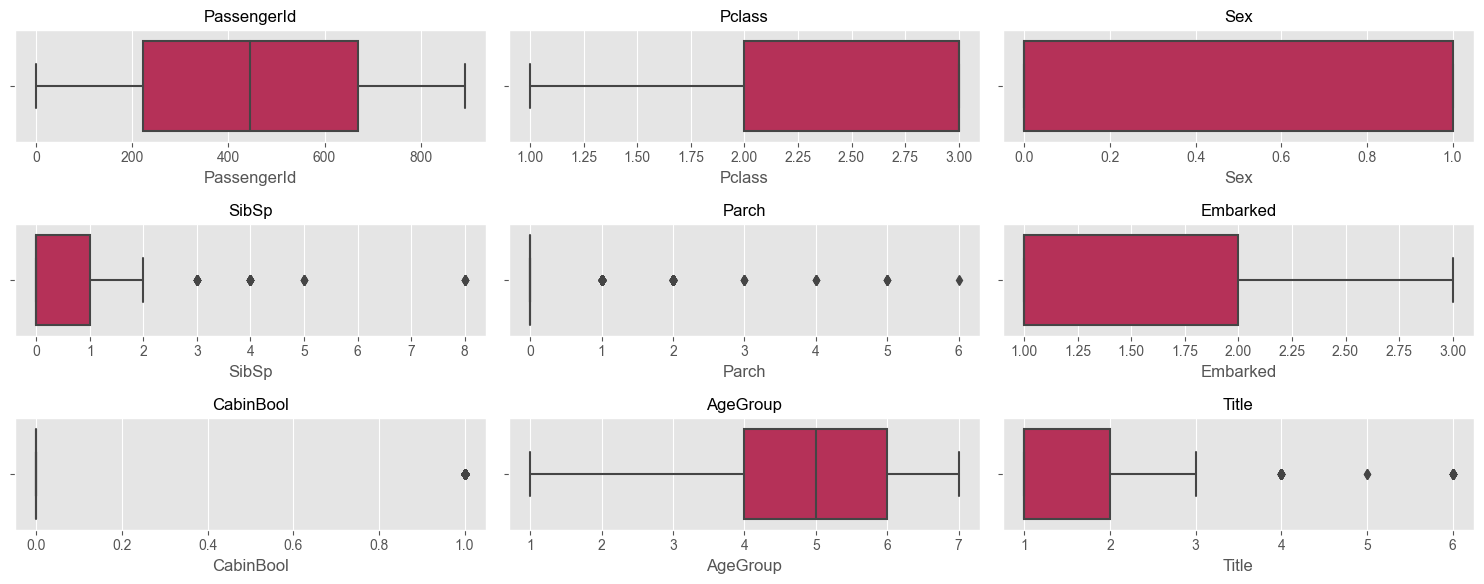

In [32]:
# Creating boxplot for each axis
fig, axs = plt.subplots(3, 3, figsize=(15, 6))

# Box plots for X, Y, and Z axes
sns.set(style='darkgrid')
sns.boxplot(x='PassengerId', data=train_data, ax=axs[0, 0],palette='rocket')
axs[0, 0].set_title('PassengerId')

sns.boxplot(x='Pclass', data=train_data, ax=axs[0, 1],palette='rocket')
axs[0, 1].set_title('Pclass')

sns.boxplot(x='Sex', data=train_data, ax=axs[0, 2],palette='rocket')
axs[0, 2].set_title('Sex')

sns.boxplot(x='SibSp', data=train_data, ax=axs[1, 0],palette='rocket')
axs[1, 0].set_title('SibSp')

sns.boxplot(x='Parch', data=train_data, ax=axs[1, 1],palette='rocket')
axs[1, 1].set_title('Parch')

sns.boxplot(x='Embarked', data=train_data, ax=axs[1, 2],palette='rocket')
axs[1, 2].set_title('Embarked')

sns.boxplot(x='CabinBool', data=train_data, ax=axs[2, 0],palette='rocket')
axs[2, 0].set_title('CabinBool')

sns.boxplot(x='AgeGroup', data=train_data, ax=axs[2, 1],palette='rocket')
axs[2, 1].set_title('AgeGroup')

sns.boxplot(x='Title', data=train_data, ax=axs[2, 2],palette='rocket')
axs[2, 2].set_title('Title')

plt.tight_layout()
plt.show()

# 2. Model Training Using Random Forest

In [33]:
 
# Drop the Survived and PassengerId 
# column from the trainset 
predictors = train_data.drop(['Survived', 'PassengerId'], axis=1) 
target = train_data["Survived"] 
x_train, x_val, y_train, y_val = train_test_split( 
    predictors, target, test_size=0.2, random_state=0) 

Using random Forest Classifier

In [34]:
 
randomforest = RandomForestClassifier() 

# Fit the training data along with its output 
randomforest.fit(x_train, y_train) 
y_pred_rf_ = randomforest.predict(x_val) 
  
# Find the accuracy score of the model 
acc_randomforest = round(accuracy_score(y_pred_rf_, y_val) * 100, 2) 
print("Accuracy using Random Forest Classifier: {} %".format(acc_randomforest))

Accuracy using Random Forest Classifier: 84.36 %


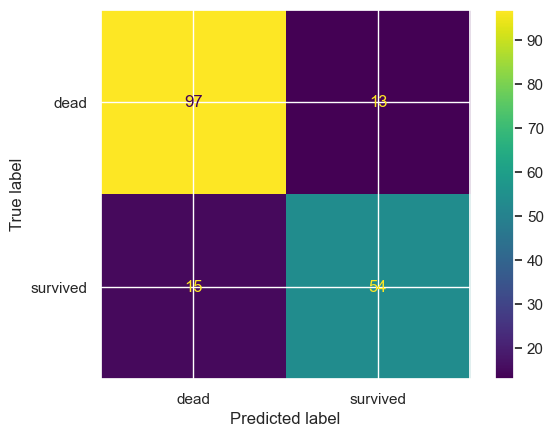

In [35]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_rf_, display_labels = ['dead', 'survived'])

In [36]:
print(classification_report(y_val, y_pred_rf_, target_names = ['dead', 'survived']))

              precision    recall  f1-score   support

        dead       0.87      0.88      0.87       110
    survived       0.81      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [37]:
ids = test_data['PassengerId'] 
predictions = randomforest.predict(test_data.drop('PassengerId', axis=1)) 

# set the output as a dataframe and convert  
# to csv file named resultfile.csv 
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions}) 
output.to_csv('RandomForest_Prediction_Report.csv', index=False)

In [38]:
# Predict probabilities on the test set
y_probs = randomforest.predict_proba(x_val)[:, 1]

In [39]:
y_probs

array([0.68195489, 0.13091145, 0.        , 1.        , 0.5825    ,
       0.38976923, 1.        , 0.87      , 0.88833333, 0.78763043,
       0.01534839, 0.68608333, 0.11949121, 0.95      , 1.        ,
       0.5402381 , 0.05116369, 0.07      , 0.19973335, 0.94166667,
       0.00980159, 1.        , 0.11949121, 0.75481349, 0.03214286,
       1.        , 0.13091145, 0.77294841, 1.        , 0.306     ,
       0.17877283, 0.68608333, 0.19973335, 0.19107875, 0.01534839,
       0.62402381, 0.        , 0.12367137, 0.12367137, 0.04253968,
       0.3385    , 0.10800029, 0.00935606, 0.05600216, 1.        ,
       0.13091145, 0.13091145, 0.95      , 0.1040011 , 0.63673557,
       0.38976923, 0.09      , 0.98      , 0.08011177, 0.55036905,
       0.015     , 0.51755159, 0.01833333, 0.094     , 0.        ,
       0.34539176, 0.4225    , 1.        , 0.57830952, 0.53666667,
       0.11949121, 0.87554762, 0.37638095, 0.98      , 0.965     ,
       0.94307143, 0.34215873, 0.26083333, 0.19973335, 0.19973

In [40]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

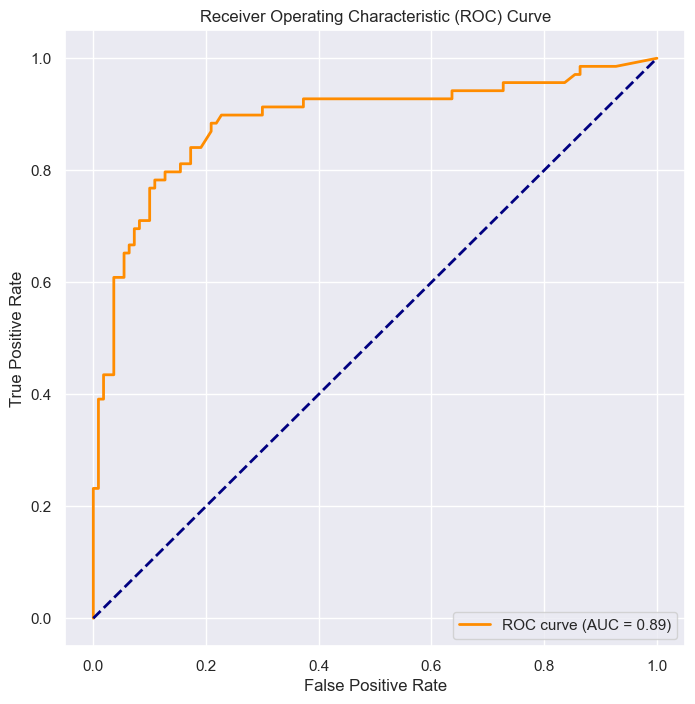

In [41]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

AUC of 0.89 falls into the "good discrimination" category. It indicates that the model has a high true positive rate and a relatively low false positive rate across different threshold settings, demonstrating its effectiveness in distinguishing between the positive and negative classes.

# 2. Model Training Using KNN

In [42]:
knn_ = KNeighborsClassifier()

# Fit the training data along with its output 
knn_.fit(x_train, y_train) 
y_pred_knn = knn_.predict(x_val) 
  
# Find the accuracy score of the model 
acc_knn = round(accuracy_score(y_pred_knn, y_val) * 100, 2) 
print("Accuracy using KNN Classifier: {} %".format(acc_knn))

Accuracy using KNN Classifier: 82.12 %


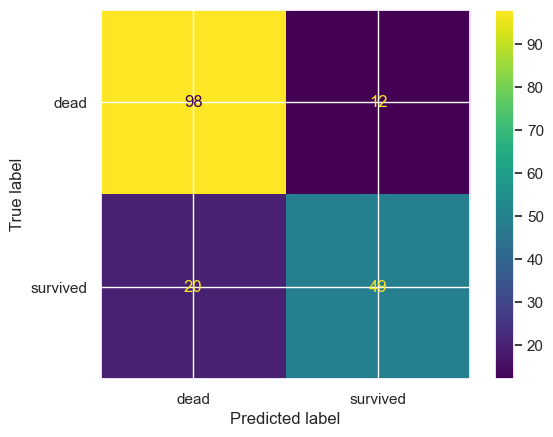

In [43]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_knn, display_labels = ['dead', 'survived'])

In [44]:
print(classification_report(y_val, y_pred_knn, target_names = ['dead', 'survived']))

              precision    recall  f1-score   support

        dead       0.83      0.89      0.86       110
    survived       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [45]:
# Predict probabilities on the test set
y_probs_knn_ = knn_.predict_proba(x_val)[:, 1]

In [46]:
# Compute ROC curve and AUC
fpr_knn_, tpr_knn_, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr_knn_, tpr_knn_)

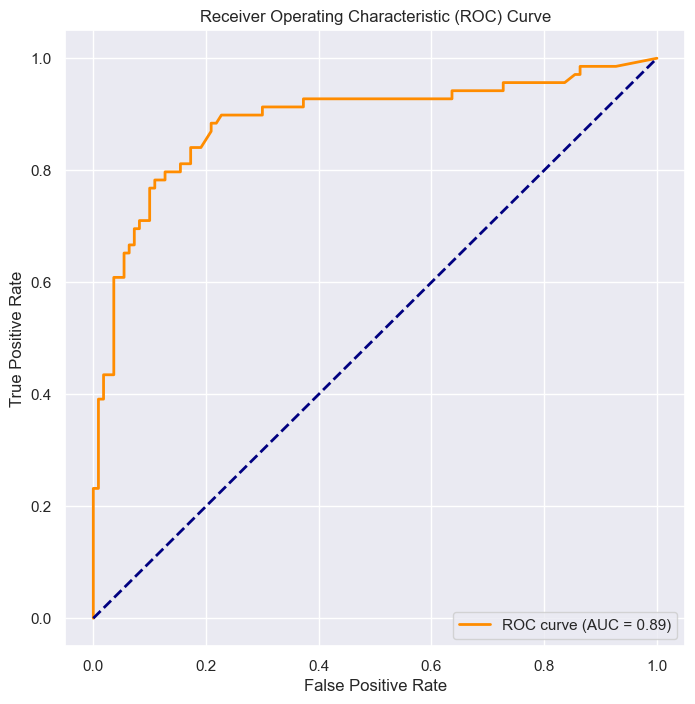

In [47]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn_, tpr_knn_, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [48]:
ids = test_data['PassengerId'] 
predictions = knn_.predict(test_data.drop('PassengerId', axis=1)) 

# set the output as a dataframe and convert  
# to csv file named resultfile.csv 
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions}) 
output.to_csv('KNN_Prediction_Report.csv', index=False)

In [49]:
from copy import deepcopy

hold_X_train = pd.DataFrame()
hold_X_test = pd.DataFrame()
hold_y_train = pd.DataFrame()
hold_y_test = pd.DataFrame()

In [50]:
def evaluate_models(models, X, y, test_data):
    """
    Fit multiple models to the data and return a dictionary of trained models.

    Parameters:
    - models: List of tuples where each tuple contains (model_name, model_instance).
    - X: Features.
    - y: Target variable.

    Returns:
    - trained_models: Dictionary containing trained models.
    """
        
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    global hold_X_train
    global hold_X_test
    global hold_y_train
    global hold_y_test
    
    hold_X_train = deepcopy(X_train)
    hold_X_test = deepcopy(X_test)
    hold_y_train = deepcopy(y_train)
    hold_y_test = deepcopy(y_test)
    
    results = []

    for model_name, model in models.items():
        # Fit the model
        
        start = time()
        
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Predict probabilities on the test set
        y_probs = model.predict_proba(X_test)[:, 1]
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred) 

        # Calculate precision
        precision = precision_score(y_test, y_pred)
        
        speed = np.round(time() - start, 3)
        
        # Compute ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        
#         # Plot ROC curve
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(model_name + " - " + 'Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = ['dead', 'survived'])
        plt.show()
        
        ids = test_data['PassengerId']
        y_pred = model.predict(test_data.drop('PassengerId', axis=1))
        # set the output as a dataframe and convert 
        # to csv file named resultfile.csv 
        output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions}) 
        text_copy = model_name + "" + "Prediction_Report_Before_Tunning.csv"
        output.to_csv(text_copy, index=False)
        
        # Store the results
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Roc_AUC' : roc_auc,
            'speed' : speed
        })

    return results

In [51]:
predictors['FareBand'] = predictors['FareBand'].astype('int64')

In [52]:
predictors.dtypes

Pclass         int64
Sex            int64
SibSp          int64
Parch          int64
Embarked       int64
CabinBool      int32
AgeGroup     float64
Title          int64
FareBand       int64
dtype: object

In [53]:
add_result = {}

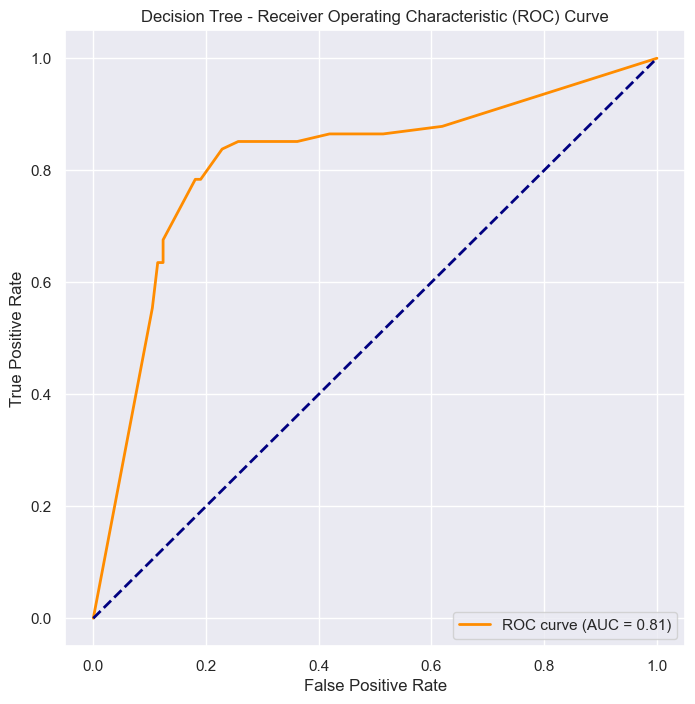

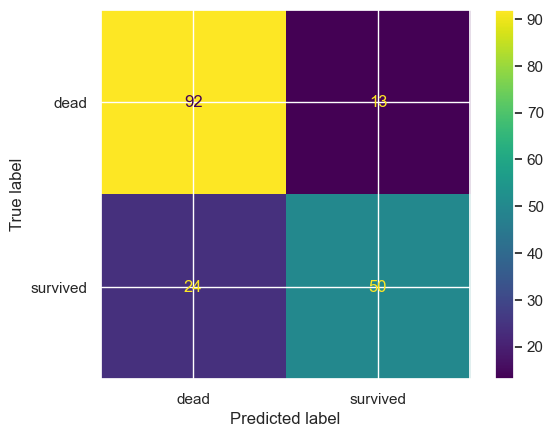

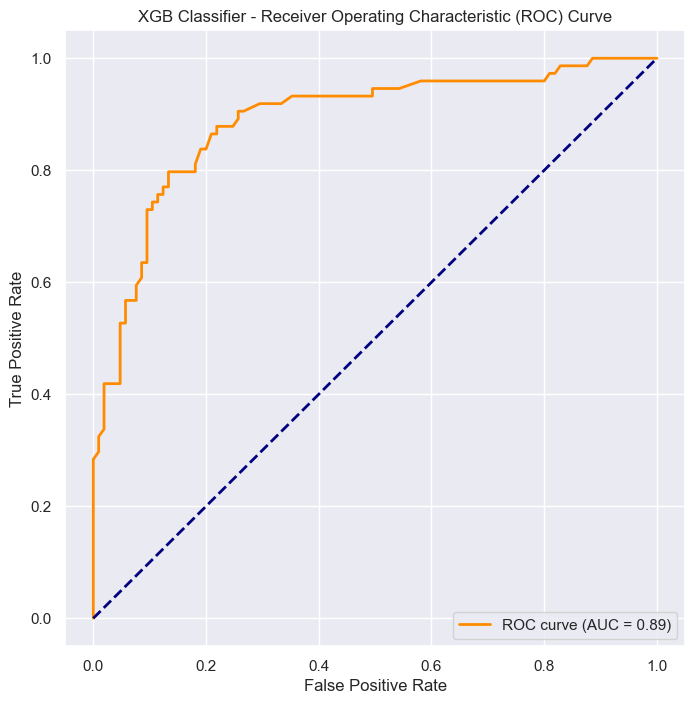

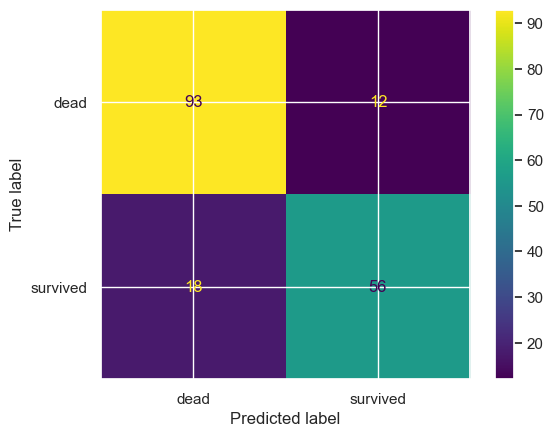

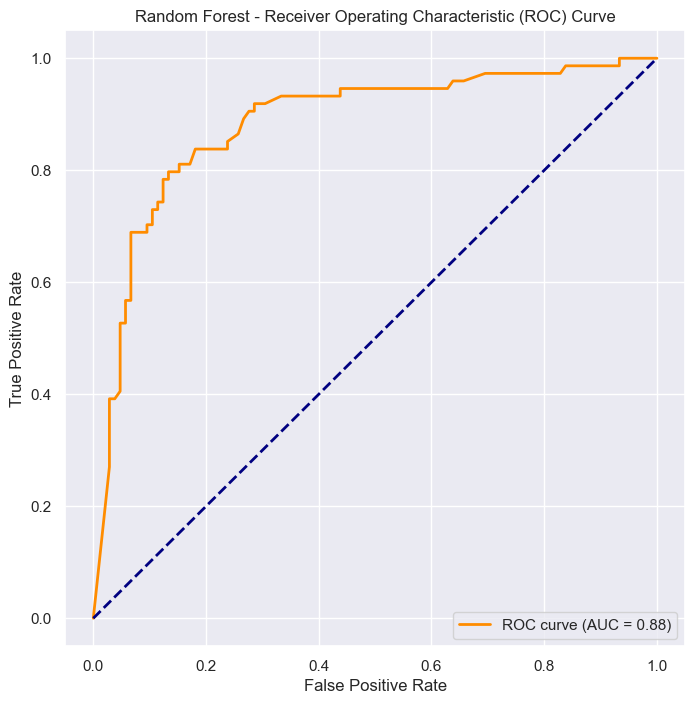

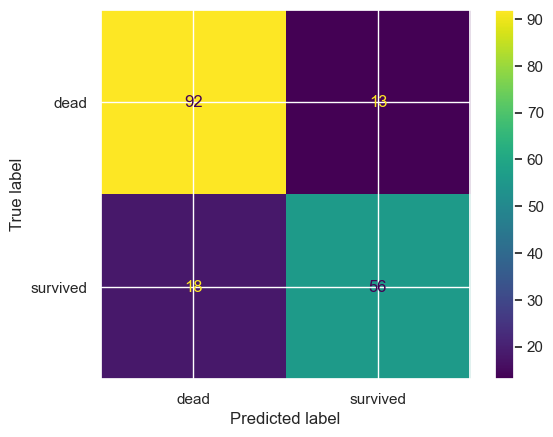

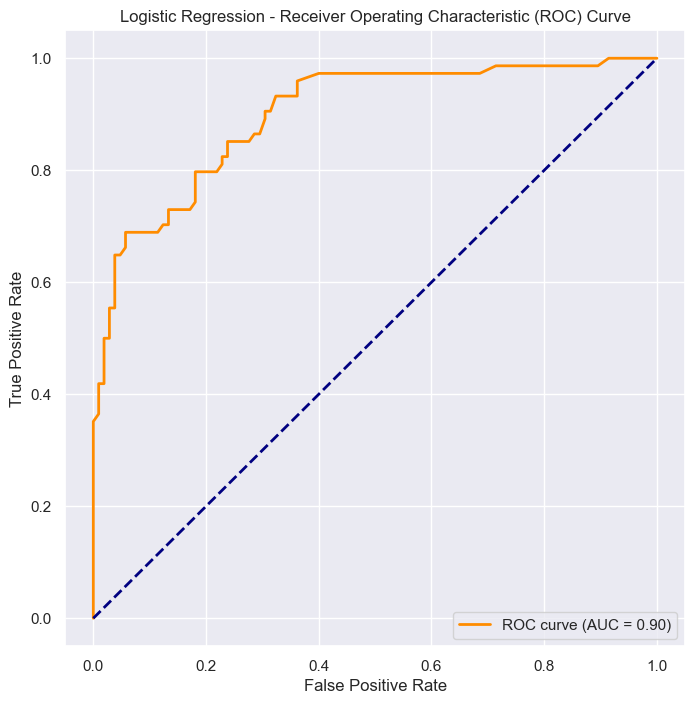

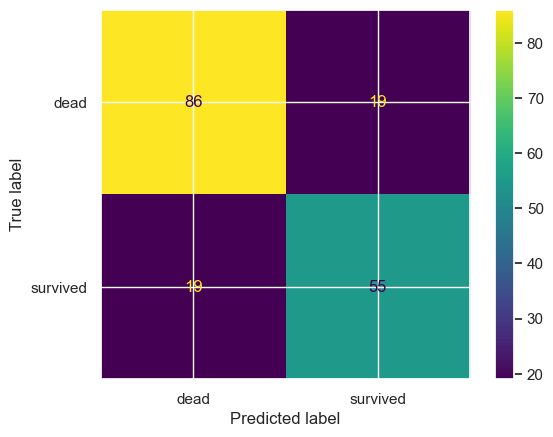

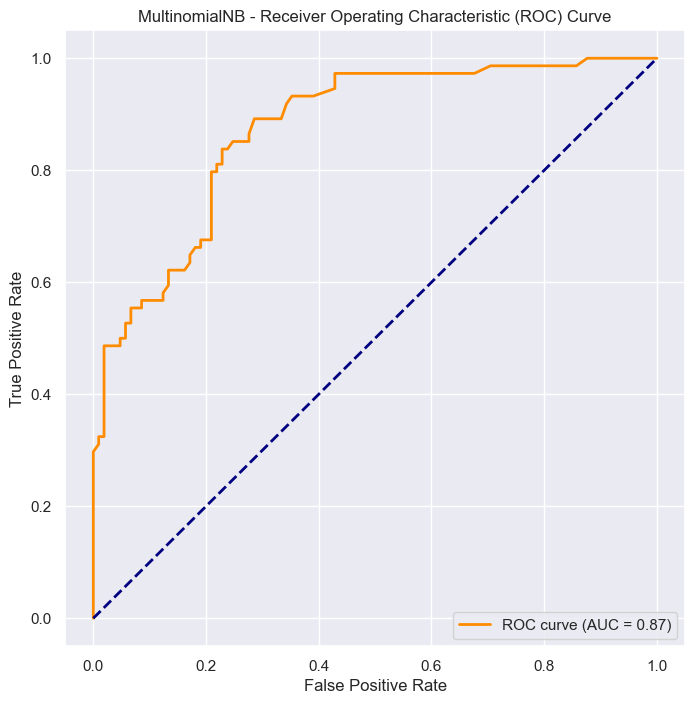

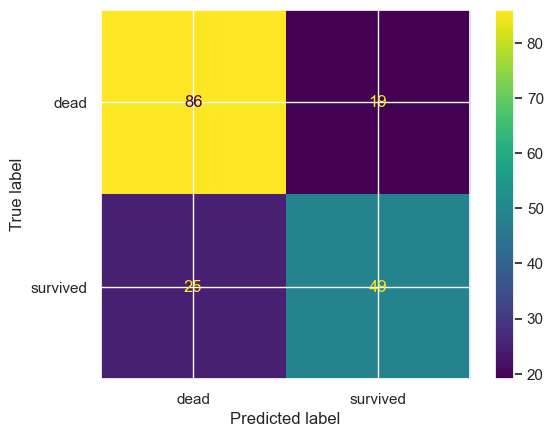

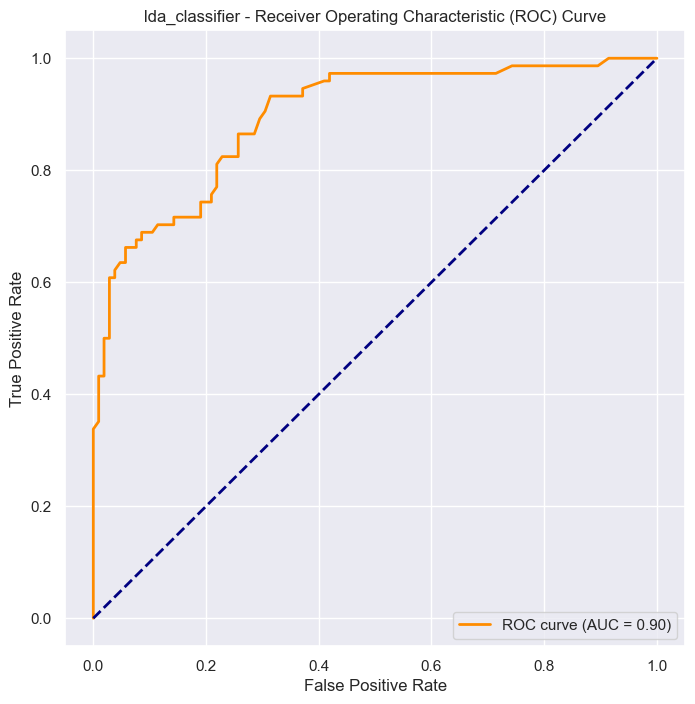

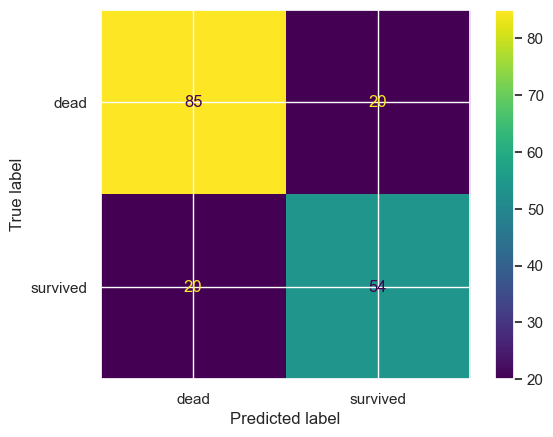

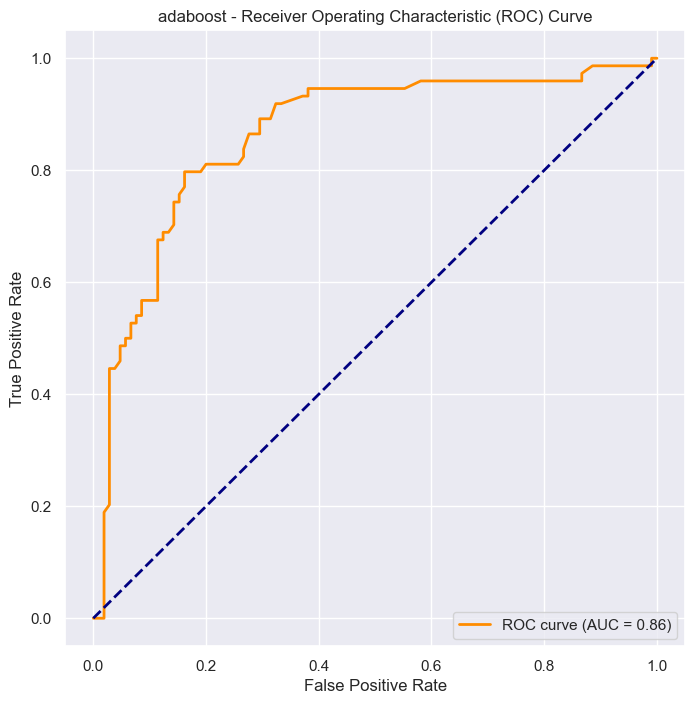

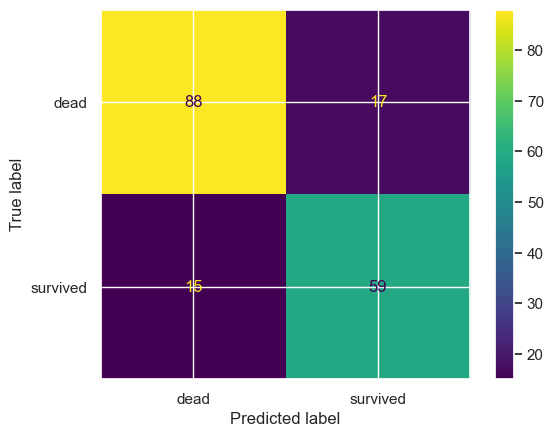

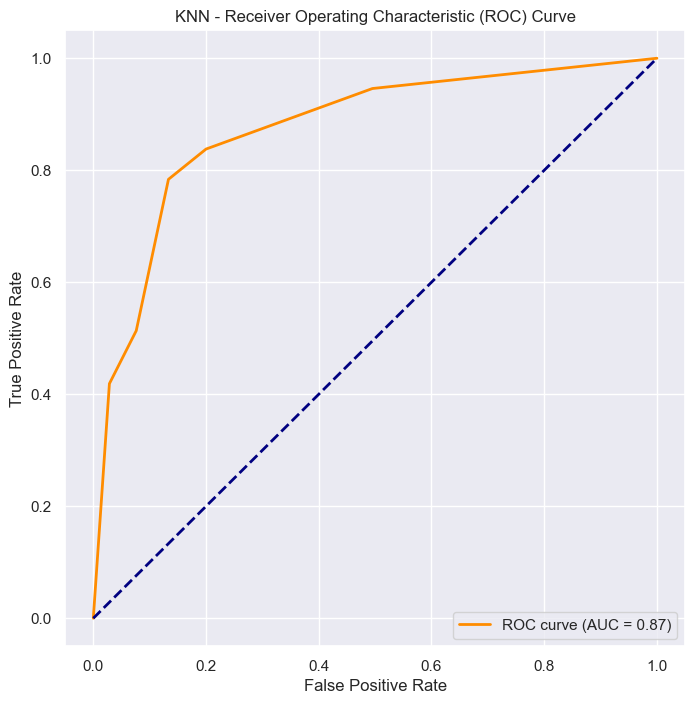

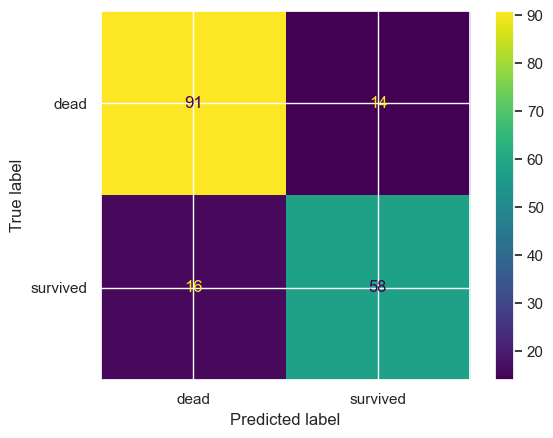

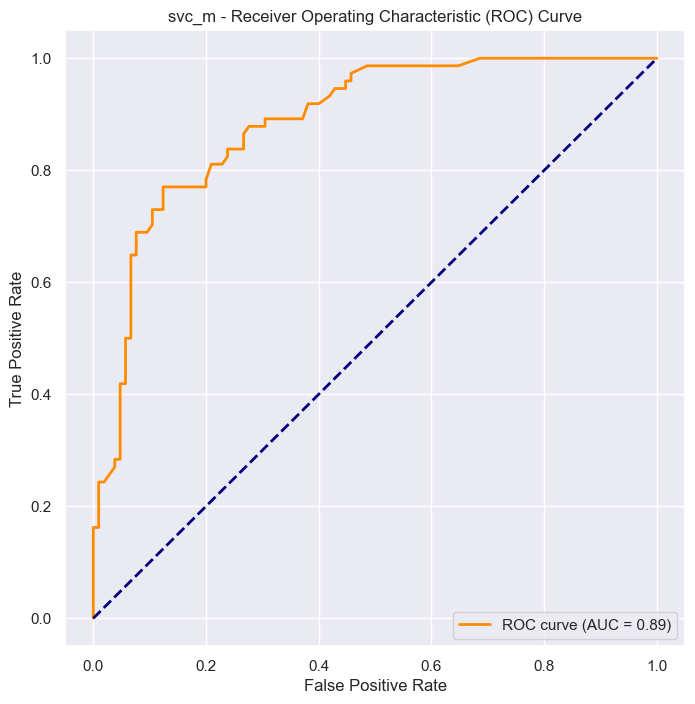

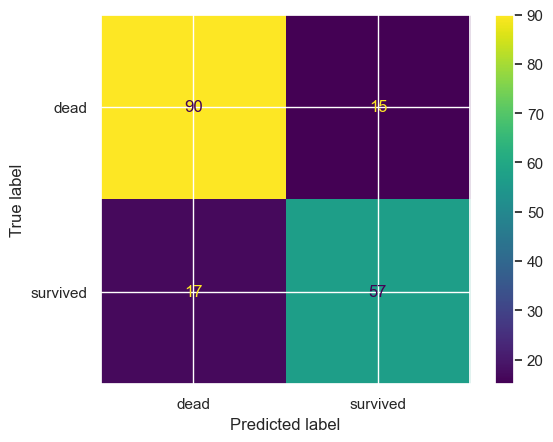

Model: Decision Tree, Accuracy: 0.7933, Precision: 0.7937, ROC_AUC: 0.81 , speed: 0.01

Model: XGB Classifier, Accuracy: 0.8324, Precision: 0.8235, ROC_AUC: 0.89 , speed: 0.11

Model: Random Forest, Accuracy: 0.8268, Precision: 0.8116, ROC_AUC: 0.88 , speed: 0.23

Model: Logistic Regression, Accuracy: 0.7877, Precision: 0.7432, ROC_AUC: 0.90 , speed: 0.02

Model: MultinomialNB, Accuracy: 0.7542, Precision: 0.7206, ROC_AUC: 0.87 , speed: 0.01

Model: lda_classifier, Accuracy: 0.7765, Precision: 0.7297, ROC_AUC: 0.90 , speed: 0.02

Model: adaboost, Accuracy: 0.8212, Precision: 0.7763, ROC_AUC: 0.86 , speed: 0.09

Model: KNN, Accuracy: 0.8324, Precision: 0.8056, ROC_AUC: 0.87 , speed: 0.01

Model: svc_m, Accuracy: 0.8212, Precision: 0.7917, ROC_AUC: 0.89 , speed: 0.10



In [54]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'XGB Classifier': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'MultinomialNB' : MultinomialNB(),
    'lda_classifier' : LinearDiscriminantAnalysis(),
    'adaboost' : AdaBoostClassifier() ,
    'KNN' : KNeighborsClassifier() ,
    'svc_m' : SVC(random_state=SEED,
    class_weight="balanced",
    probability=True,)
}

# Call function
results = evaluate_models(models, predictors, target, test_data)

add_result = results

# Display the results
for result in results:
    print(f"Model: {result['Model']}, Accuracy: {result['Accuracy']:.4f}, Precision: {result['Precision']:.4f}, ROC_AUC: {result['Roc_AUC']:.2f} , speed: {result['speed']:.2f}\n")

In [55]:
hold_X_train

,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,Title,FareBand
331,1,0,0,0,1,1,6.0,1,3
733,2,0,0,0,1,0,4.0,1,2
382,3,0,0,0,1,0,5.0,1,2
704,3,0,1,0,1,0,5.0,1,1
813,3,1,4,2,1,0,2.0,2,4
...,...,...,...,...,...,...,...,...,...
106,3,1,0,0,1,0,4.0,2,1
270,1,0,0,0,1,0,5.0,1,3
860,3,0,2,0,1,0,6.0,1,2
435,1,1,1,2,1,1,3.0,2,4


In [56]:
df = pd.DataFrame.from_dict(add_result)
df['Accuracy%'] = ( df['Accuracy'] * 100 ).round(3)
df['Precision%'] = ( df['Precision'] * 100 ).round(3)
df['Roc_AUC%'] = ( df['Roc_AUC'] * 100 ).round(3)
df

,Model,Accuracy,Precision,Roc_AUC,speed,Accuracy%,Precision%,Roc_AUC%
0,Decision Tree,0.793296,0.793651,0.814607,0.008,79.330,79.365,81.461
1,XGB Classifier,0.832402,0.823529,0.888288,0.110,83.240,82.353,88.829
2,Random Forest,0.826816,0.811594,0.883591,0.230,82.682,81.159,88.359
3,Logistic Regression,0.787709,0.743243,0.899292,0.023,78.771,74.324,89.929
4,MultinomialNB,0.754190,0.720588,0.873810,0.012,75.419,72.059,87.381
5,lda_classifier,0.776536,0.729730,0.895045,0.024,77.654,72.973,89.505
6,adaboost,0.821229,0.776316,0.862870,0.090,82.123,77.632,86.287
7,KNN,0.832402,0.805556,0.873745,0.015,83.240,80.556,87.375
8,svc_m,0.821229,0.791667,0.886036,0.099,82.123,79.167,88.604


In [57]:
color_type = ["green", "blue", "green", "red", "orange", "yellow"]

In [58]:
df.hvplot.barh(x='Model', y='Accuracy%', grid=True, fontsize=14, color='Accuracy%', colorbar=True, width=700)

:Bars   [Model]   (Accuracy%)

In [59]:
df.hvplot.barh(x='Model', y='Roc_AUC%', grid=True, fontsize=14, color='Roc_AUC%', colorbar=True, width=700)

:Bars   [Model]   (Roc_AUC%)

In [60]:
df.hvplot.barh(x='Model', y='speed', grid=True, fontsize=14, color='speed', colorbar=True, width=700)

:Bars   [Model]   (speed)

# Hyperparameter Tuning

# Decision Tree

In [61]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [62]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

In [63]:
cross_valid_scores = {}

In [64]:
%%time
parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
    'criterion': ['gini', 'entropy'],
    'random_state': [0]
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_desicion_tree.fit(hold_X_train, hold_y_train)

tune_model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    param_grid=parameters, scoring = 'roc_auc', cv = cv_split )

best_est_DT = tune_model_desicion_tree.fit(hold_X_train, hold_y_train)

cross_valid_scores['desicion_tree'] = tune_model_desicion_tree.best_score_

clf_performance(best_est_DT,'Decision Tree')

Decision Tree
Best Score: 0.8436263911596331
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'random_state': 0}
CPU times: total: 562 ms
Wall time: 594 ms


In [65]:
#         results.append({
#             'Model': model_name,
#             'Accuracy': accuracy,
#             'Precision': precision,
#             'Roc_AUC' : roc_auc,
#             'speed' : speed
#         })
cross_valid_scores

{'desicion_tree': 0.8436263911596331}

In [66]:
data1_x_bin = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'CabinBool', 'AgeGroup',
       'Title', 'FareBand']

In [67]:
dot_data = tree.export_graphviz(model_desicion_tree, out_file=dot_file_path, 
                                feature_names = data1_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source.from_file(dot_file_path)
graph.render(view=True)

'D:\\TreeChart\\decision_tree.dot.pdf'

# Random Forest

In [68]:
%%time
parameters = {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

model_random_forest = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

tune_model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    verbose = True,
    scoring='roc_auc',
    n_jobs = -1
)

best_est_rf = tune_model_random_forest.fit(hold_X_train, hold_y_train)

cross_valid_scores['random_forest'] = tune_model_random_forest.best_score_

clf_performance(best_est_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8563090135686597
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 450}
CPU times: total: 4.66 s
Wall time: 4min 40s


## XGBOOST

In [69]:
%%time
parameters = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

model_xgb = XGBClassifier(
    random_state=42,)

tune_model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='roc_auc',
)

best_est_xgb = tune_model_xgb.fit(hold_X_train, hold_y_train)

cross_valid_scores['xgboost'] = tune_model_xgb.best_score_

clf_performance(best_est_xgb,'XGB')

XGB
Best Score: 0.8593025201131518
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 450, 'reg_alpha': 1, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.6}
CPU times: total: 23min 39s
Wall time: 4min 55s


## Adaboost

In [70]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
    "learning_rate": [0.001, 0.01, 0.1, 1.],
}

model_adaboost = AdaBoostClassifier(
    random_state=42,
)

tune_model_adaboost = GridSearchCV(
    model_adaboost, 
    parameters, 
    cv=5,
    scoring='roc_auc',
    verbose = True, n_jobs = -1
)

best_est_adaboost = tune_model_adaboost.fit(hold_X_train, hold_y_train)

cross_valid_scores['ada_boost'] = tune_model_adaboost.best_score_

clf_performance(best_est_adaboost,'Adaboost')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Adaboost
Best Score: 0.8622582754618477
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 75}
CPU times: total: 906 ms
Wall time: 6.67 s


## Logistic Regression

In [71]:
%%time
parameters = { 'max_iter' : [2000], 
              'penalty' : ['l1', 'l2'], 
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']
             }

model_logistic_regression = LogisticRegression(
    random_state=42,
    class_weight="balanced"
)

tune_model_logistic_regression = GridSearchCV(
    model_logistic_regression, 
    parameters, 
    cv=5,
    scoring='roc_auc',
    verbose = True, n_jobs = -1
)

best_est_LogReg = tune_model_logistic_regression.fit(hold_X_train, hold_y_train)

cross_valid_scores['logistic_regression'] = tune_model_logistic_regression.best_score_

clf_performance(best_est_LogReg,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8556951261252193
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
CPU times: total: 578 ms
Wall time: 937 ms


## SVC

In [72]:
%%time
parameters = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10], 
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]

model_svc = SVC(
    random_state=42,
    class_weight="balanced",
    probability=True,
)

tune_model_svc = GridSearchCV(
    model_svc, 
    parameters, 
    cv=5,
    scoring='roc_auc',
    verbose = True, n_jobs = -1
)

best_est_svc = tune_model_svc.fit(hold_X_train, hold_y_train)

cross_valid_scores['svc'] = tune_model_svc.best_score_

clf_performance(best_est_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8544293323668455
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
CPU times: total: 1.16 s
Wall time: 2min 43s


## KNN

In [73]:
%%time
parameters = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}

model_k_neighbors = KNeighborsClassifier()

tune_model_k_neighbors = GridSearchCV(
    model_k_neighbors, 
    parameters, 
    cv=5,
    scoring='roc_auc',
    verbose = True, n_jobs = -1
)

best_est_knn = tune_model_k_neighbors.fit(hold_X_train, hold_y_train)

cross_valid_scores['k_neighbors'] = tune_model_k_neighbors.best_score_

clf_performance(best_est_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8558398316070035
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
CPU times: total: 375 ms
Wall time: 847 ms


## Naive Bias

In [74]:
%%time
parameters = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(predictors), ]}

model_nb = MultinomialNB()

tune_multinomial_nb_grid = GridSearchCV(model_nb, param_grid=parameters, scoring='roc_auc',n_jobs=-1, cv=5, verbose=5)

best_est_NB = tune_multinomial_nb_grid.fit(hold_X_train, hold_y_train)

cross_valid_scores['multinomial_nb'] = tune_multinomial_nb_grid.best_score_

clf_performance(best_est_NB,'NB')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
NB
Best Score: 0.8404647715584221
Best Parameters: {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}
CPU times: total: 328 ms
Wall time: 418 ms


## LDA

In [75]:
grid=dict()
grid['solver']=['svd', 'lsqr', 'eigen']
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [76]:
model_lda = LinearDiscriminantAnalysis()

model_lda=GridSearchCV(model_lda, grid, scoring='roc_auc', cv=cv, n_jobs=-1 )

best_est_lda = model_lda.fit(hold_X_train, hold_y_train)

cross_valid_scores['multinomial_nb'] = model_lda.best_score_

clf_performance(best_est_lda,'LDA')

LDA
Best Score: 0.8556069958847736
Best Parameters: {'solver': 'lsqr'}


In [77]:
voting_clf = VotingClassifier(estimators = [('lr',model_logistic_regression),
                                            ('knn',model_k_neighbors),
                                            ('rf',model_random_forest),
                                            ('mnb',model_nb),
                                            ('svc',model_svc),
                                            ('xgb',model_xgb),
                                           ('lda', model_lda),
                                           ('DT', model_desicion_tree),
                                           ('ADB', model_adaboost)], voting = 'soft') 

In [78]:
best_dt = best_est_DT.best_estimator_
best_rf = best_est_rf.best_estimator_
best_xgb = best_est_xgb.best_estimator_
best_adaboost = best_est_adaboost.best_estimator_
best_lr = best_est_LogReg.best_estimator_
best_knn = best_est_knn.best_estimator_
best_svc = best_est_svc.best_estimator_
best_mnb = best_est_NB.best_estimator_
best_lda = best_est_lda.best_estimator_

In [81]:
#voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
#voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
#voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

voting_clf_soft_all = VotingClassifier(estimators = [('DT',best_dt),
                                                ('rf',best_rf),
                                                ('xgb', best_xgb),
                                                ('ADB', best_adaboost),
#                                                ('lr', best_lr),
                                                ('knn',best_knn),
                                                ('svc',best_svc)],
#                                                ('mnb',best_mnb),
#                                                ('lda', best_lda)], 
                                                     voting = 'soft') 

voting_clf_hard_all = VotingClassifier(estimators = [('DT',best_dt),
                                                ('rf',best_rf),
                                                ('xgb', best_xgb),
                                                ('ADB', best_adaboost),
#                                                ('lr', best_lr),
                                                ('knn',best_knn),
                                                ('svc',best_svc)],
#                                                ('mnb',best_mnb),
#                                                ('lda', best_lda)], 
                                                     voting = 'hard') 



print('voting_clf_soft_all :',cross_val_score(voting_clf_soft_all,hold_X_train,hold_y_train,cv=9))
print('voting_clf_soft_all mean :',cross_val_score(voting_clf_soft_all,hold_X_train,hold_y_train,cv=9).mean())

print("\n")

print('voting_clf_hard_all :',cross_val_score(voting_clf_hard_all,hold_X_train,hold_y_train,cv=9))
print('voting_clf_hard_all mean :',cross_val_score(voting_clf_hard_all,hold_X_train,hold_y_train,cv=9).mean())

voting_clf_soft_all : [0.8375     0.83544304 0.82278481 0.88607595 0.83544304 0.7721519
 0.82278481 0.79746835 0.91139241]
voting_clf_soft_all mean : 0.8356715893108299


voting_clf_hard_all : [0.825      0.84810127 0.82278481 0.88607595 0.82278481 0.7721519
 0.82278481 0.78481013 0.92405063]
voting_clf_hard_all mean : 0.8342827004219409


In [82]:
test_data_predictors = test_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked',
       'CabinBool', 'AgeGroup', 'Title', 'FareBand']]

In [83]:
hold_X_test

,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,Title,FareBand
709,3,0,1,1,2,0,1.0,4,3
439,2,0,0,0,1,0,5.0,1,2
840,3,0,0,0,1,0,4.0,1,2
720,2,1,0,1,1,0,2.0,2,4
39,3,1,1,0,2,0,3.0,2,2
...,...,...,...,...,...,...,...,...,...
433,3,0,0,0,1,0,3.0,1,1
773,3,0,0,0,2,0,5.0,1,1
25,3,1,1,5,1,0,6.0,3,4
84,2,1,0,0,1,0,3.0,2,2


In [97]:
tuned_results = []

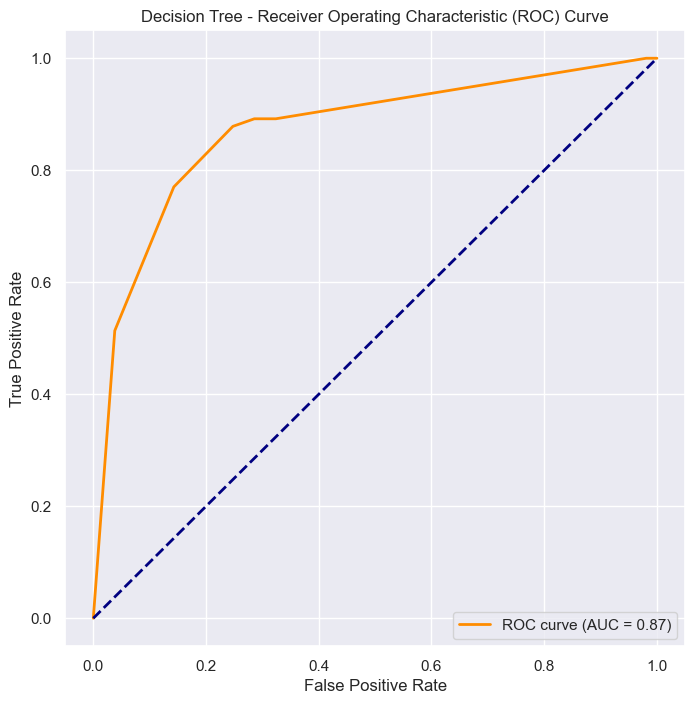

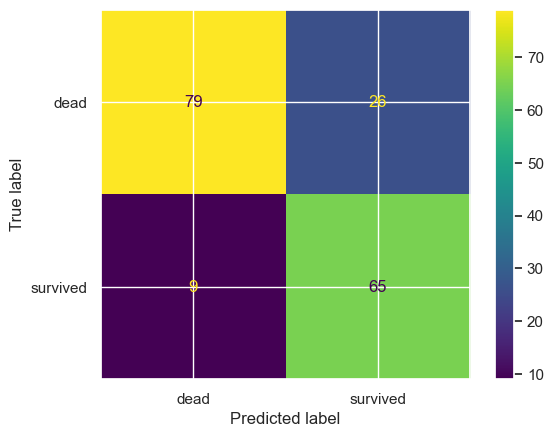

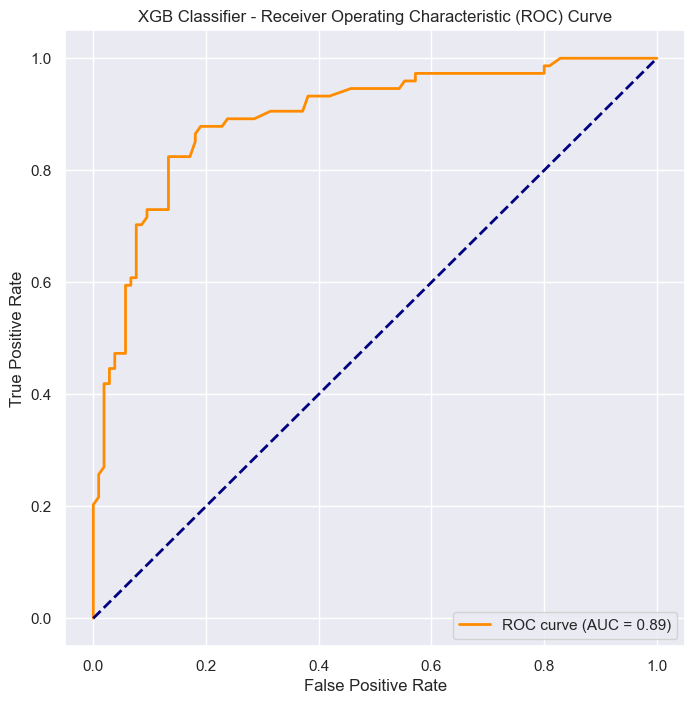

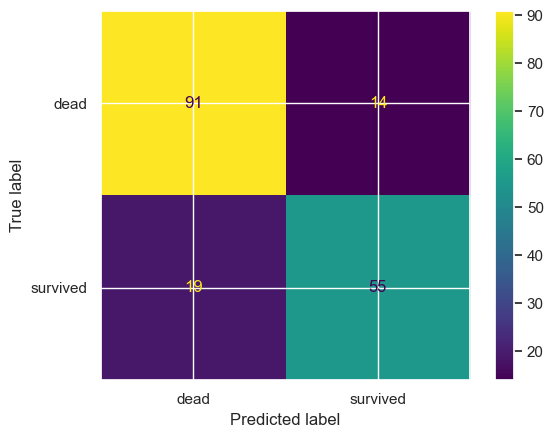

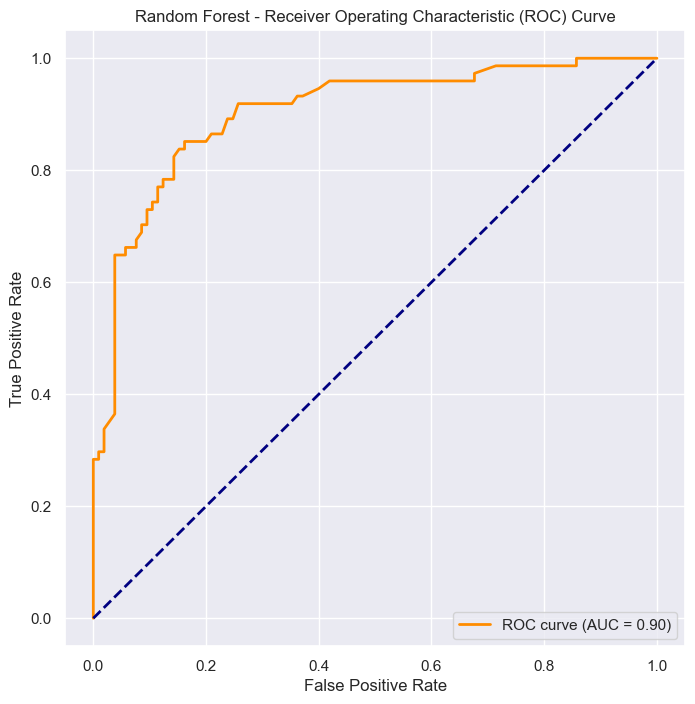

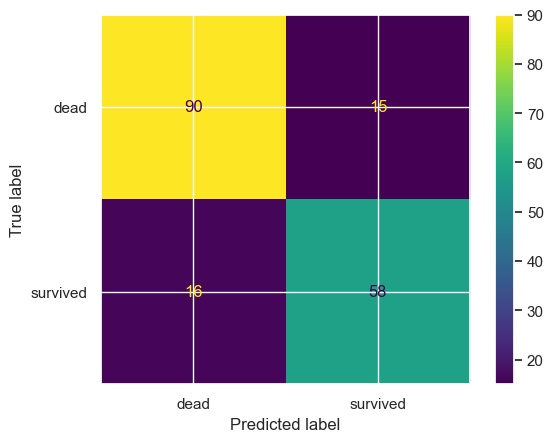

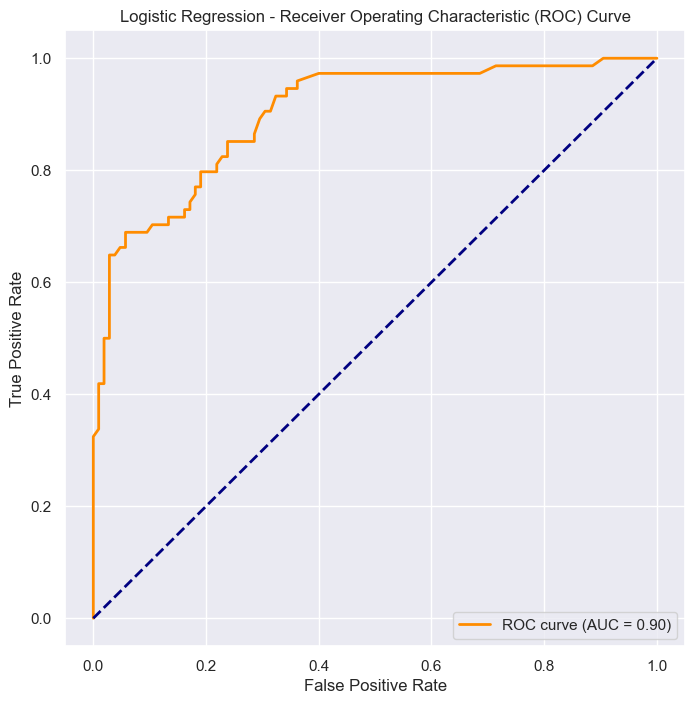

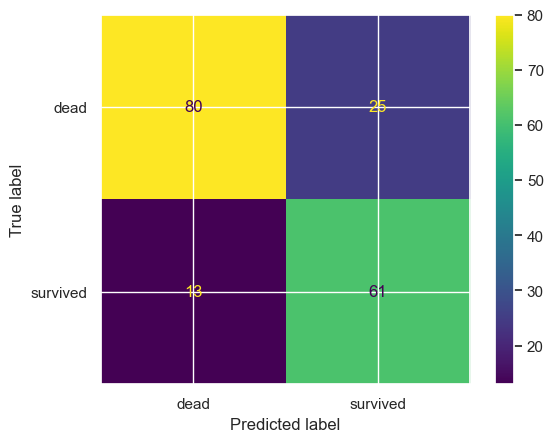

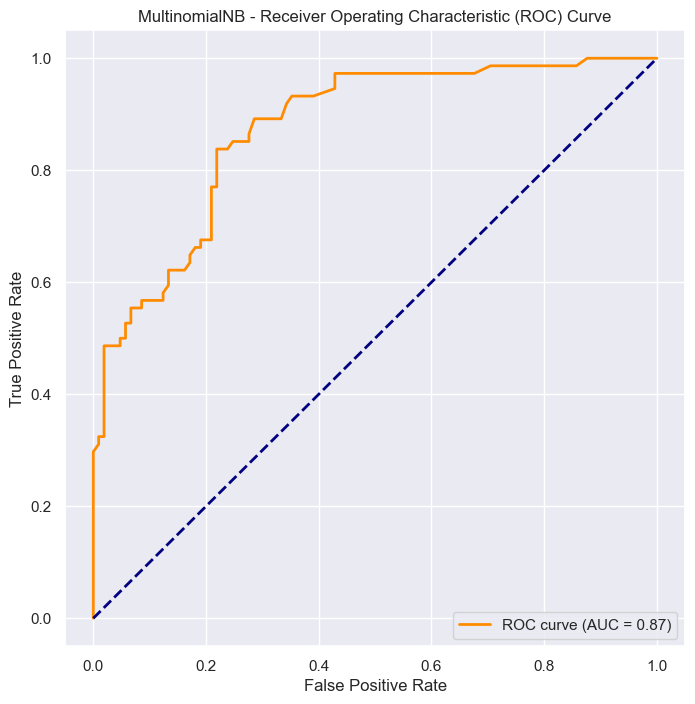

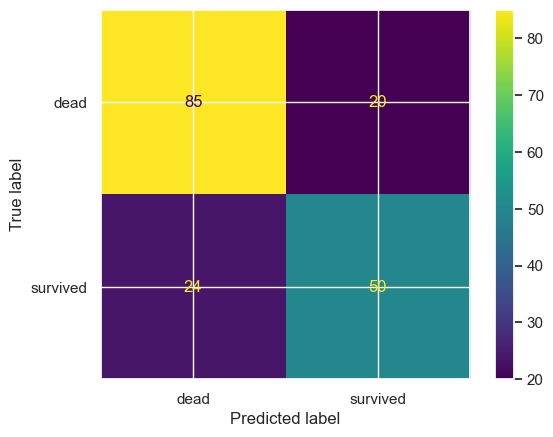

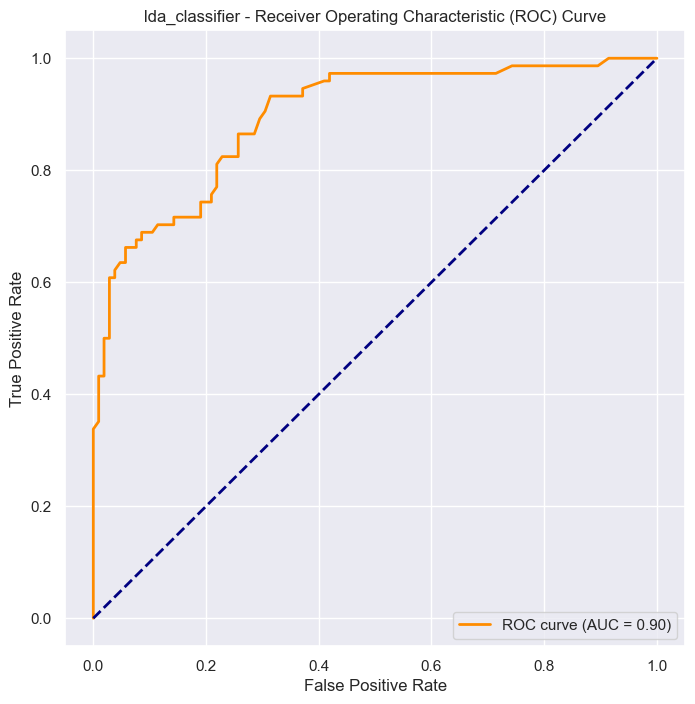

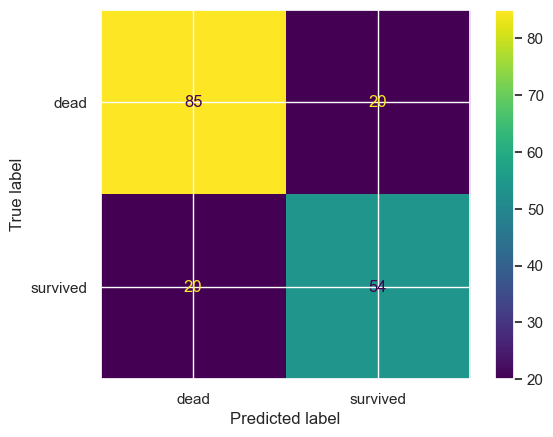

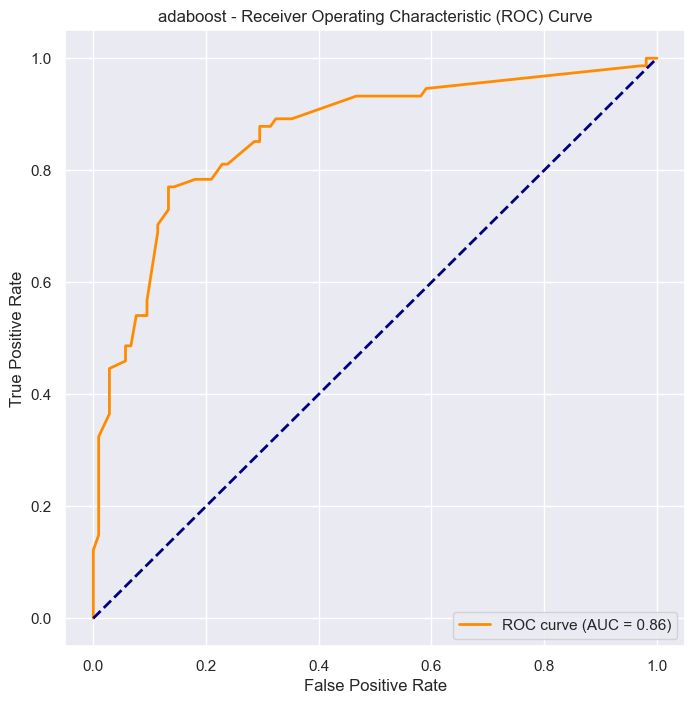

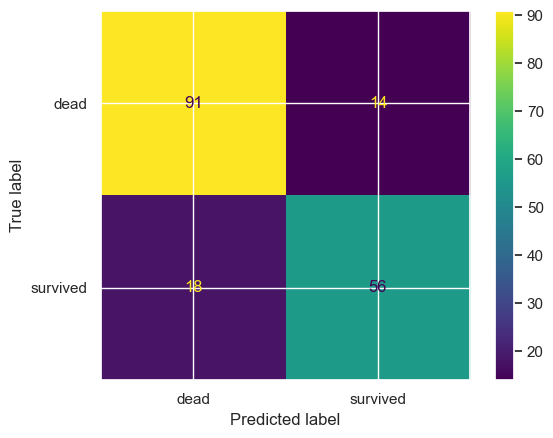

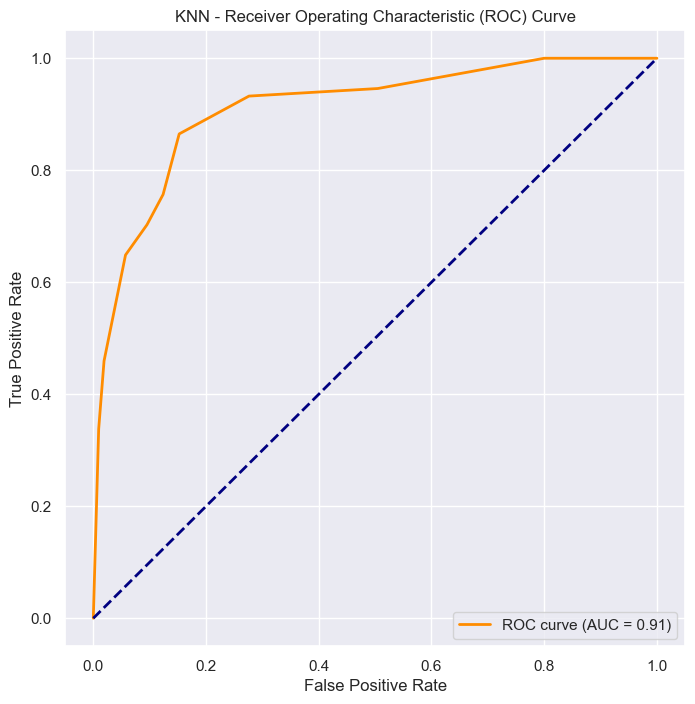

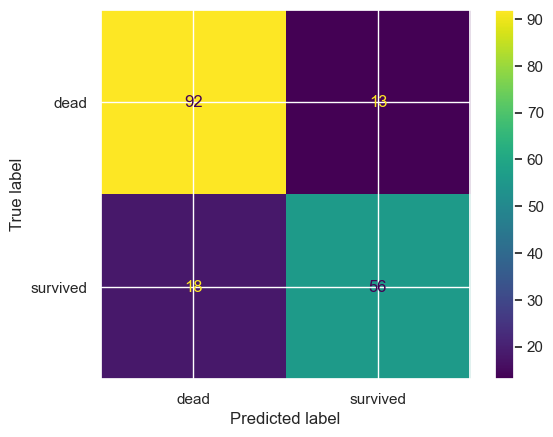

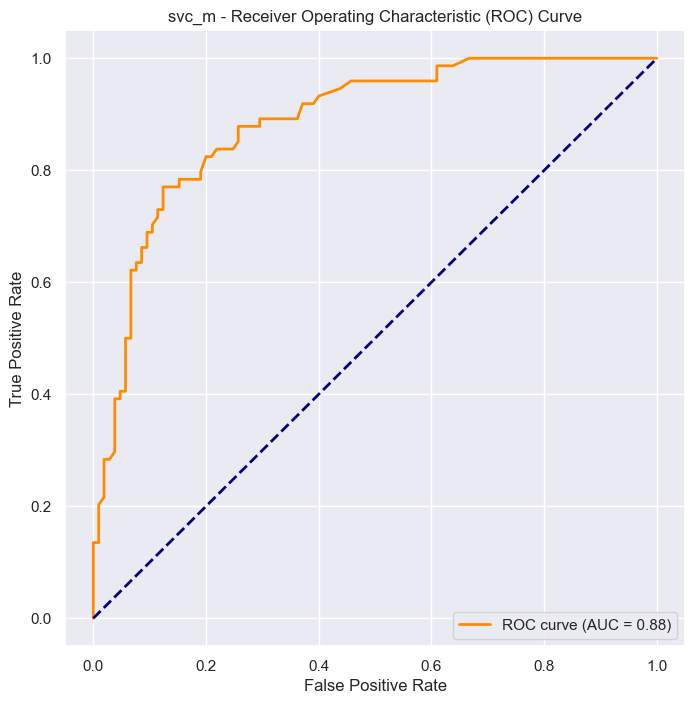

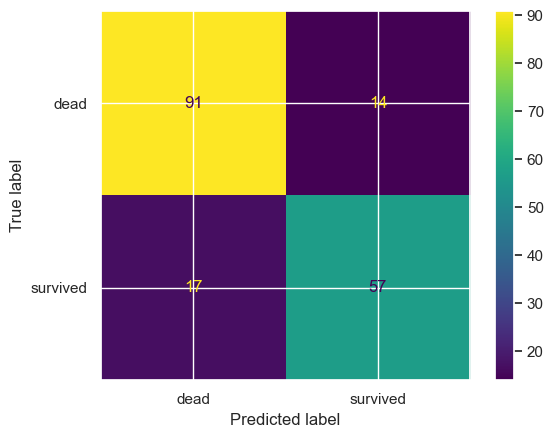

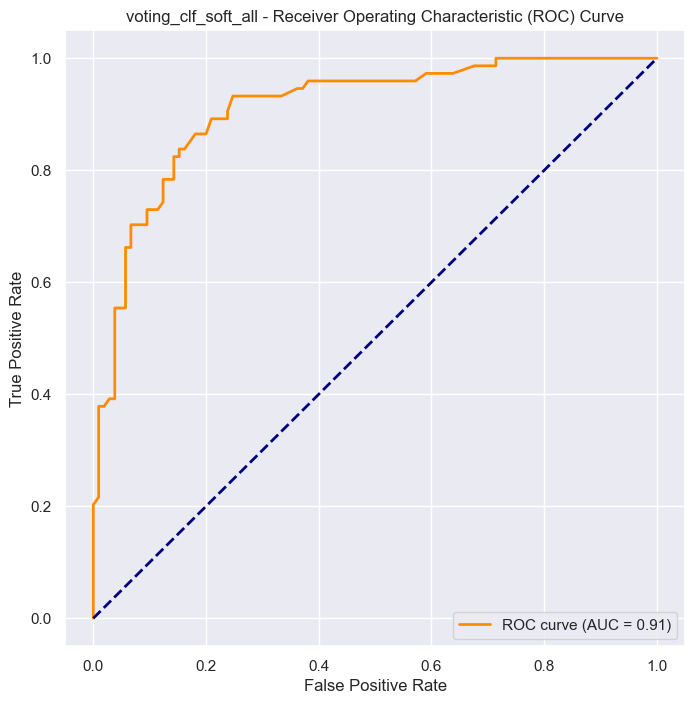

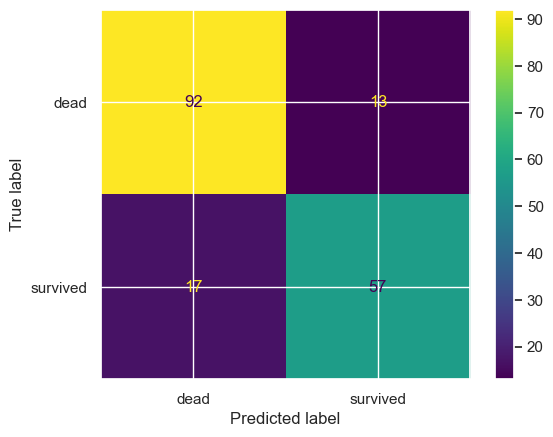

In [98]:
best_dt.fit(hold_X_train, hold_y_train)
best_rf.fit(hold_X_train, hold_y_train)
best_xgb.fit(hold_X_train, hold_y_train)
best_adaboost.fit(hold_X_train, hold_y_train)
best_lr.fit(hold_X_train, hold_y_train)
best_knn.fit(hold_X_train, hold_y_train)
best_svc.fit(hold_X_train, hold_y_train)
best_mnb.fit(hold_X_train, hold_y_train)
best_lda.fit(hold_X_train, hold_y_train)

voting_clf_soft_all.fit(hold_X_train, hold_y_train)
voting_clf_hard_all.fit(hold_X_train, hold_y_train)

#print(accuracy_score(hold_y_test, best_dt.predict(hold_X_test).astype(int)))

models_used = {
    'Decision Tree': best_dt,
    'XGB Classifier': best_xgb,    
    'Random Forest': best_rf,
    'Logistic Regression' : best_lr,
    'MultinomialNB' : best_mnb,
    'lda_classifier' : best_lda,   
    'adaboost': best_adaboost,
    'KNN' : best_knn,
    'svc_m' : best_svc,
    'voting_clf_soft_all' : voting_clf_soft_all
#    'voting_clf_hard_all' : voting_clf_hard_all
}

for used_model_name, model_used in models_used.items():
    
    hold_y_probs = model_used.predict_proba(hold_X_test)[:, 1]
    tuned_accuracy = accuracy_score(hold_y_test, model_used.predict(hold_X_test).astype(int))
    tuned_precision = precision_score(hold_y_test, model_used.predict(hold_X_test).astype(int))
            
    # Compute ROC curve and AUC
    tuned_fpr, tuned_tpr, tuned_thresholds = roc_curve(hold_y_test, hold_y_probs)
    if (used_model_name != voting_clf_hard_all):
        tuned_roc_auc = auc(tuned_fpr, tuned_tpr)
    else:
        hold_y_probs = 0
        tuned_roc_auc = 0
    
        
    tuned_results.append({
            'Model': used_model_name,
            'Accuracy': tuned_accuracy,
            'Precision': tuned_precision,
            'roc_auc': tuned_roc_auc
    })
    plt.figure(figsize=(8, 8))
    plt.plot(tuned_fpr, tuned_tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {tuned_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(used_model_name + " - " + 'Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    
    ConfusionMatrixDisplay.from_predictions(hold_y_test, model_used.predict(hold_X_test).astype(int), display_labels = ['dead', 'survived'])
    plt.show()

y_hat_dt = best_dt.predict(test_data_predictors).astype(int)
y_hat_rf = best_rf.predict(test_data_predictors).astype(int)
y_hat_xgb = best_xgb.predict(test_data_predictors).astype(int)
y_hat_adaboost = best_adaboost.predict(test_data_predictors).astype(int)
y_hat_lr = best_lr.predict(test_data_predictors).astype(int)
y_hat_knn = best_knn.predict(test_data_predictors).astype(int)
y_hat_svc = best_svc.predict(test_data_predictors).astype(int)
y_hat_mnb = best_mnb.predict(test_data_predictors).astype(int)
y_hat_lda = best_lda.predict(test_data_predictors).astype(int)

y_hat_vc_soft = voting_clf_soft_all.predict(test_data_predictors).astype(int)
y_hat_vc_hard = voting_clf_hard_all.predict(test_data_predictors).astype(int)

In [99]:
df_tuned = pd.DataFrame.from_dict(tuned_results)
df_tuned['Accuracy%'] = ( df_tuned['Accuracy'] * 100 ).round(3)
df_tuned['Precision%'] = ( df_tuned['Precision'] * 100 ).round(3)
df_tuned['roc_auc%'] = ( df_tuned['roc_auc'] * 100 ).round(3)
df_tuned

,Model,Accuracy,Precision,roc_auc,Accuracy%,Precision%,roc_auc%
0,Decision Tree,0.804469,0.714286,0.871750,80.447,71.429,87.175
1,XGB Classifier,0.815642,0.797101,0.894530,81.564,79.710,89.453
2,Random Forest,0.826816,0.794521,0.903153,82.682,79.452,90.315
3,Logistic Regression,0.787709,0.709302,0.900579,78.771,70.930,90.058
4,MultinomialNB,0.754190,0.714286,0.873810,75.419,71.429,87.381
5,lda_classifier,0.776536,0.729730,0.895045,77.654,72.973,89.505
6,adaboost,0.821229,0.800000,0.863063,82.123,80.000,86.306
7,KNN,0.826816,0.811594,0.909459,82.682,81.159,90.946
8,svc_m,0.826816,0.802817,0.884878,82.682,80.282,88.488
9,voting_clf_soft_all,0.832402,0.814286,0.909846,83.240,81.429,90.985


In [100]:
df

,Model,Accuracy,Precision,Roc_AUC,speed,Accuracy%,Precision%,Roc_AUC%
0,Decision Tree,0.793296,0.793651,0.814607,0.008,79.330,79.365,81.461
1,XGB Classifier,0.832402,0.823529,0.888288,0.110,83.240,82.353,88.829
2,Random Forest,0.826816,0.811594,0.883591,0.230,82.682,81.159,88.359
3,Logistic Regression,0.787709,0.743243,0.899292,0.023,78.771,74.324,89.929
4,MultinomialNB,0.754190,0.720588,0.873810,0.012,75.419,72.059,87.381
5,lda_classifier,0.776536,0.729730,0.895045,0.024,77.654,72.973,89.505
6,adaboost,0.821229,0.776316,0.862870,0.090,82.123,77.632,86.287
7,KNN,0.832402,0.805556,0.873745,0.015,83.240,80.556,87.375
8,svc_m,0.821229,0.791667,0.886036,0.099,82.123,79.167,88.604


In [101]:
y_hat_vc_hard

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [102]:
#convert output to dataframe 

final_data_1 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_dt}
submission_1 = pd.DataFrame(data=final_data_1)

final_data_2 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_rf}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_xgb}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_adaboost}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_lr}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_6 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_knn}
submission_6 = pd.DataFrame(data=final_data_6)

final_data_7 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_svc}
submission_7 = pd.DataFrame(data=final_data_7)

final_data_8 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_mnb}
submission_8 = pd.DataFrame(data=final_data_8)

final_data_9 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_lda}
submission_9 = pd.DataFrame(data=final_data_9)

final_data_10 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_vc_soft} # Voting happens on Probability
submission_10 = pd.DataFrame(data=final_data_10)

final_data_11 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_vc_hard} # Voting happens on Max no. of Same values along the algo
submission_11 = pd.DataFrame(data=final_data_11)


final_data_comp = {'PassengerId': test_data.PassengerId, 
                   'Survived_vc_soft': y_hat_vc_soft, 
                   'Survived_vc_hard': y_hat_vc_hard,
                   'Survived_dt': y_hat_dt, 
                   'Survived_rf' : y_hat_rf, 
                   'Survived_xgb' : y_hat_xgb,  
                   'Survived_adb' : y_hat_adaboost,
                   'Survived_LogReg' : y_hat_lr,
                   'Survived_knn' : y_hat_knn,
                   'Survived_svc' : y_hat_svc,
                   'Survived_mNB' : y_hat_mnb,
                   'Survived_lda' : y_hat_lda
                  }

comparison = pd.DataFrame(data=final_data_comp)

In [103]:
comparison

,PassengerId,Survived_vc_soft,Survived_vc_hard,Survived_dt,Survived_rf,Survived_xgb,Survived_adb,Survived_LogReg,Survived_knn,Survived_svc,Survived_mNB,Survived_lda
0,892,0,0,0,0,0,0,0,0,0,0,0
1,893,1,1,1,1,0,1,1,1,1,0,1
2,894,0,0,0,0,0,0,0,0,0,0,0
3,895,0,0,0,0,0,0,0,0,0,0,0
4,896,1,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0,0,0,0,0,0,0,0,0,0
414,1306,1,1,0,1,1,1,1,1,1,1,1
415,1307,0,0,0,0,0,0,0,0,0,0,0
416,1308,0,0,0,0,0,0,0,0,0,0,0


In [104]:
comparison.columns

Index(['PassengerId', 'Survived_vc_soft', 'Survived_vc_hard', 'Survived_dt',
       'Survived_rf', 'Survived_xgb', 'Survived_adb', 'Survived_LogReg',
       'Survived_knn', 'Survived_svc', 'Survived_mNB', 'Survived_lda'],
      dtype='object')

In [105]:
def comparison_report(diff_between_model, test_target_1_algo, test_target_2_algo):
    comparison[diff_between_model] = comparison.apply(lambda x: 1 if x[test_target_1_algo] != x[test_target_2_algo] 
                                                        else 0, axis =1)
    

In [106]:
comparison_report('difference_soft_vc_hard', 'Survived_vc_soft', 'Survived_vc_hard')

In [107]:
comparison

,PassengerId,Survived_vc_soft,Survived_vc_hard,Survived_dt,Survived_rf,Survived_xgb,Survived_adb,Survived_LogReg,Survived_knn,Survived_svc,Survived_mNB,Survived_lda,difference_soft_vc_hard
0,892,0,0,0,0,0,0,0,0,0,0,0,0
1,893,1,1,1,1,0,1,1,1,1,0,1,0
2,894,0,0,0,0,0,0,0,0,0,0,0,0
3,895,0,0,0,0,0,0,0,0,0,0,0,0
4,896,1,1,1,1,1,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0,0,0,0,0,0,0,0,0,0,0
414,1306,1,1,0,1,1,1,1,1,1,1,1,0
415,1307,0,0,0,0,0,0,0,0,0,0,0,0
416,1308,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
comparison.difference_soft_vc_hard.value_counts()

difference_soft_vc_hard
0    418
Name: count, dtype: int64

In [109]:
#prepare submission files 
submission_1.to_csv('submission_dt_After_Tunning.csv', index =False)
submission_2.to_csv('submission_rf_After_Tunning.csv', index =False)
submission_3.to_csv('submission_xgb_After_Tunning.csv', index =False)
submission_4.to_csv('submission_adaboost_After_Tunning.csv', index =False)
submission_5.to_csv('submission_lr_After_Tunning.csv', index =False)
submission_6.to_csv('submission_knn_After_Tunning.csv', index =False)
submission_7.to_csv('submission_svc_After_Tunning.csv', index =False)
submission_8.to_csv('submission_mnb_After_Tunning.csv', index =False)
submission_9.to_csv('submission_lda_After_Tunning.csv', index =False)

submission_10.to_csv('submission_vc_soft_After_Tunning.csv', index =False)
submission_11.to_csv('submission_vc_hard_After_Tunning.csv', index =False)